In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms

from matplotlib.ticker import MultipleLocator  
import matplotlib.pyplot as plt


Сумма прошлогодних протестов у тех, кто протестовал в текущем году.

В годовой сумме по году t суммируете лаги только по тем муниципалитетам, которые имели протест в самом году t.

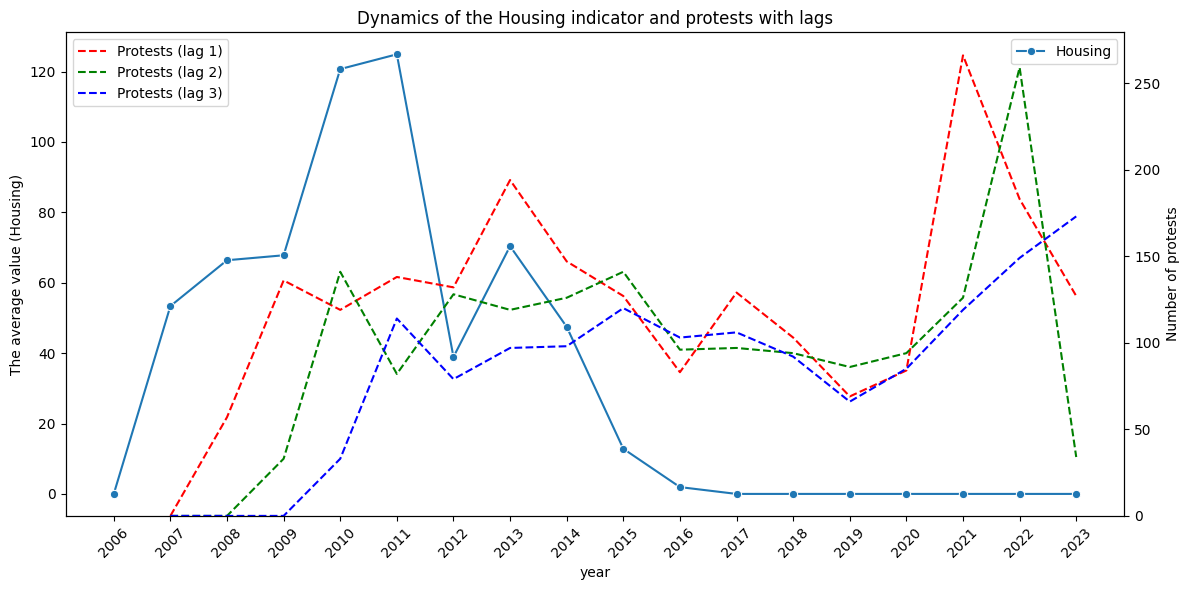

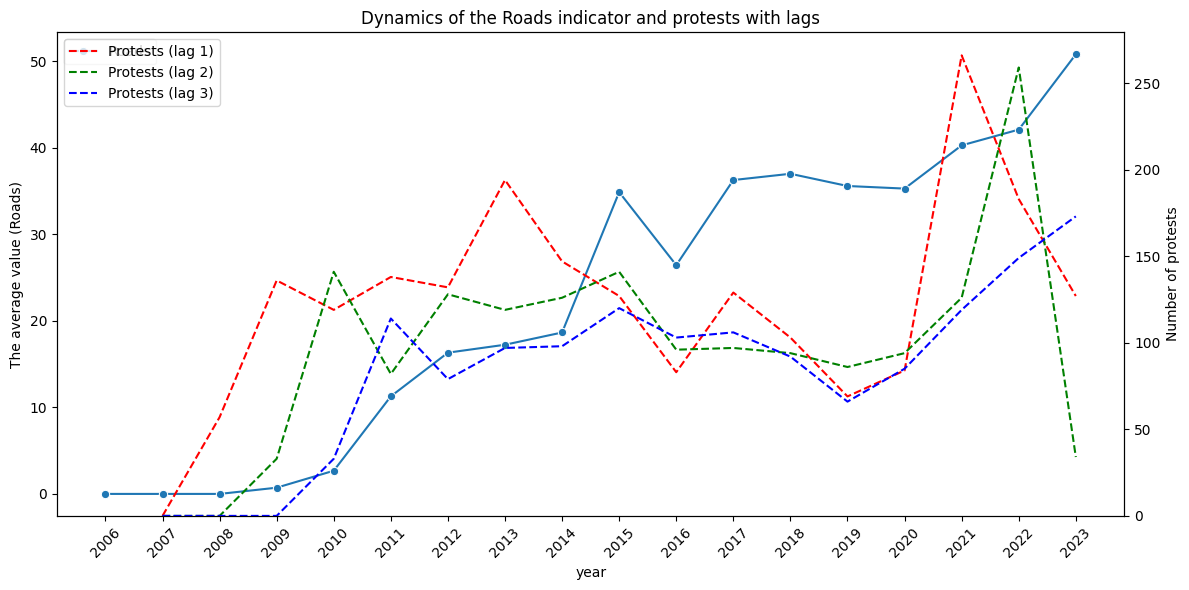

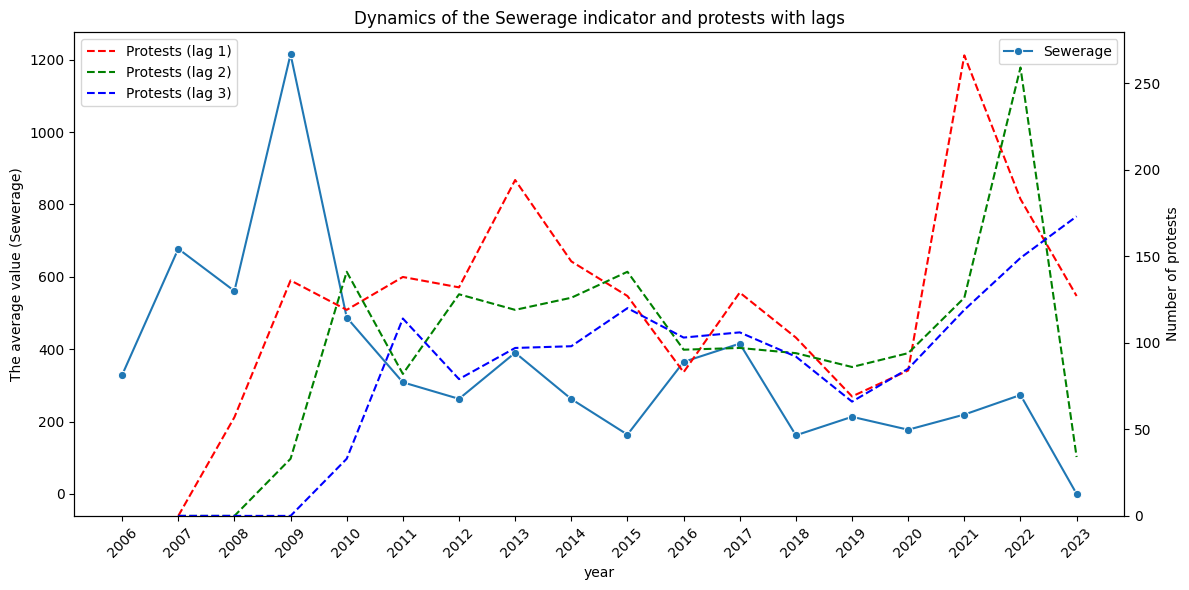

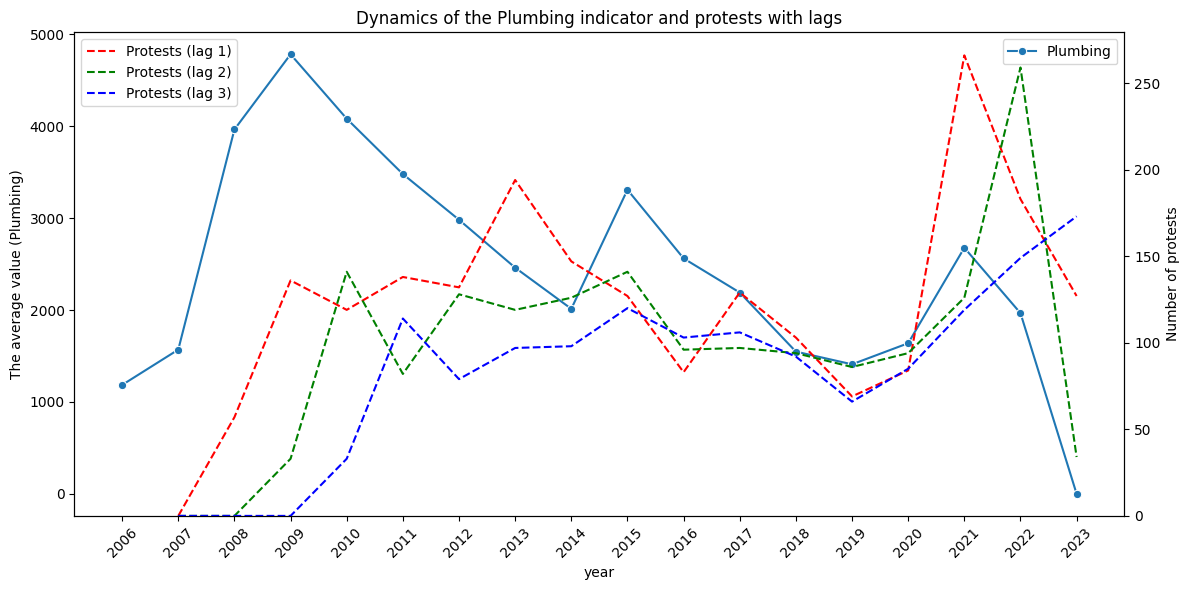

In [7]:
data = pd.read_csv('общие_данные_new1.csv')

# Определяем, какие события считаем протестами
protest_events = ["Demonstrate or rally", "Criticize or denounce", "Defy norms, law"]
protests = data[data['Event Text'].isin(protest_events)]

# Считаем количество протестов по муниципалитетам и годам
protests_count = (
    protests
    .groupby(['municipality', 'year'])
    .size()
    .reset_index(name='protest_count')
)




# Считаем количество протестов по муниципалитетам и годам
protests_count = protests.groupby(['municipality', 'year']).size().reset_index(name='protest_count')
for lag in [1, 2, 3]:
    protests_count[f'protest_lag_{lag}'] = protests_count.groupby('municipality')['protest_count'].shift(lag)


merged_data = pd.merge(data, protests_count, on=['municipality', 'year'], how='left')
merged_data.fillna(0, inplace=True)


dependent_vars = ['Жилье (1000 м2)', 'Дороги (%)', 'Канализация (1 м)', 'Водопровод (1 метр)']

# Считаем средние значения инфраструктуры по годам
annual_infra = (
    merged_data
    .groupby('year')[dependent_vars]
    .mean()
    .reset_index()
)

# Считаем суммарное число протестов и их лаги по годам
annual_protests = (
    protests_count
    .groupby('year')
    .agg({
        'protest_count': 'sum',
        'protest_lag_1': 'sum',
        'protest_lag_2': 'sum',
        'protest_lag_3': 'sum',
    })
    .reset_index()
    .rename(columns={'protest_count': 'protest_sum'})
)


annual_data = pd.merge(
    annual_infra,
    annual_protests,
    on='year',
    how='left'
)
annual_data = annual_data[annual_data['year'] >= 2000]

rename_map = {
    'Жилье (1000 м2)': 'Housing',
    'Дороги (%)': 'Roads',
    'Канализация (1 м)': 'Sewerage',
    'Водопровод (1 метр)': 'Plumbing'
}
annual_data.rename(columns=rename_map, inplace=True)


dependent_vars = ['Housing', 'Roads', 'Sewerage', 'Plumbing']


for dep_var in dependent_vars:
    plt.figure(figsize=(12, 6))

    ax1 = plt.gca()
    sns.lineplot(
        data=annual_data,
        x='year', y=dep_var,
        ax=ax1,
        marker='o',
        label=dep_var
    )

    ax1.xaxis.set_major_locator(MultipleLocator(1))
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel(f'The average value ({dep_var})')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    sns.lineplot(
        data=annual_data,
        x='year', y='protest_lag_1',
        ax=ax2,
        color='red', linestyle='--',
        label='Protests (lag 1)'
    )
    sns.lineplot(
        data=annual_data,
        x='year', y='protest_lag_2',
        ax=ax2,
        color='green', linestyle='--',
        label='Protests (lag 2)'
    )
    sns.lineplot(
        data=annual_data,
        x='year', y='protest_lag_3',
        ax=ax2,
        color='blue', linestyle='--',
        label='Protests (lag 3)'
    )

    ax2.set_ylabel('Number of protests')
    ax2.set_ylim(bottom=0)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines2 = lines2[len(lines1):]
    labels2 = labels2[len(labels1):]

    plt.title(f'Dynamics of the {dep_var} indicator and protests with lags')
    plt.tight_layout()
    plt.show()


# Считаем суммарное число протестов по годам (без лагов)
annual_protests_simple = (
    protests_count
    .groupby('year')['protest_count']
    .sum()
    .reset_index()
)

# Фильтруем по нужному диапазону лет, если требуется
annual_protests_simple = annual_protests_simple[annual_protests_simple['year'] >= 2000]



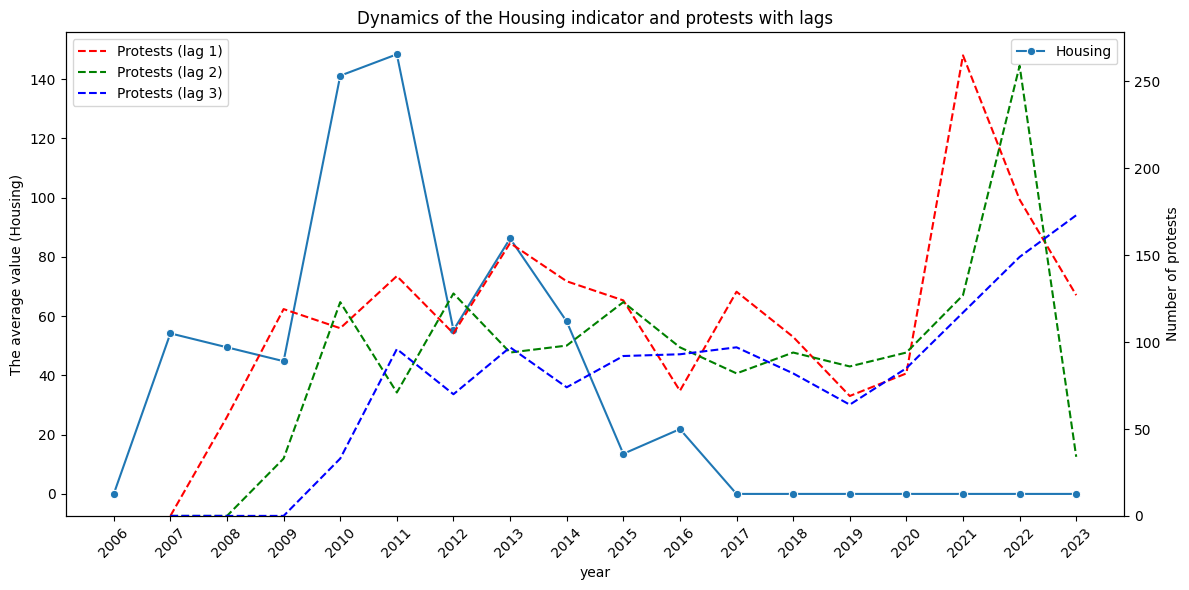

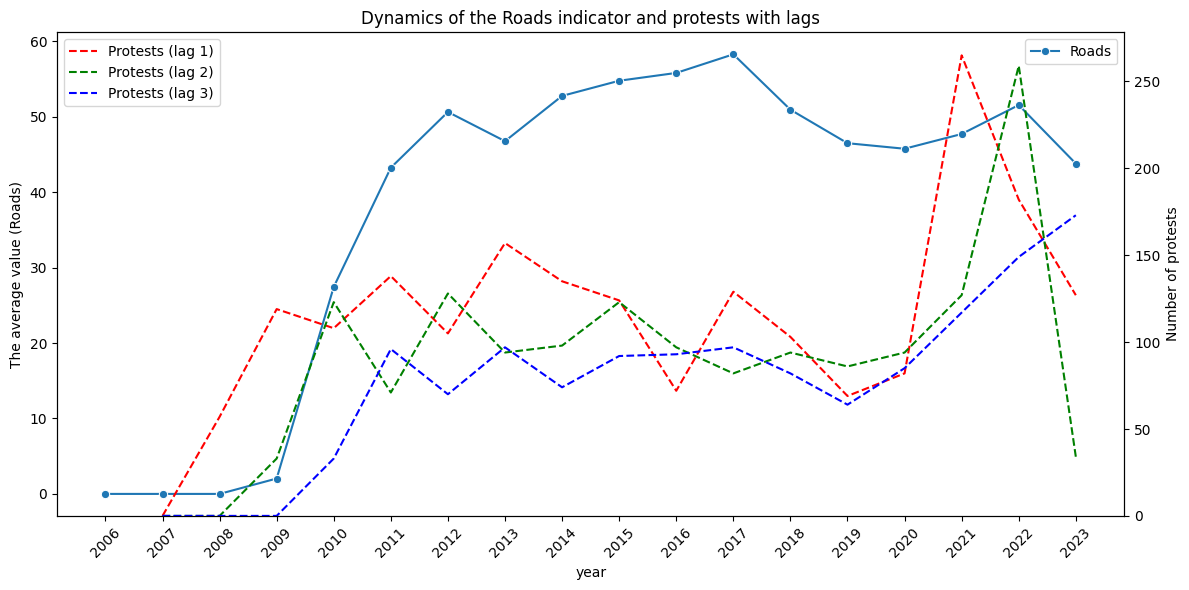

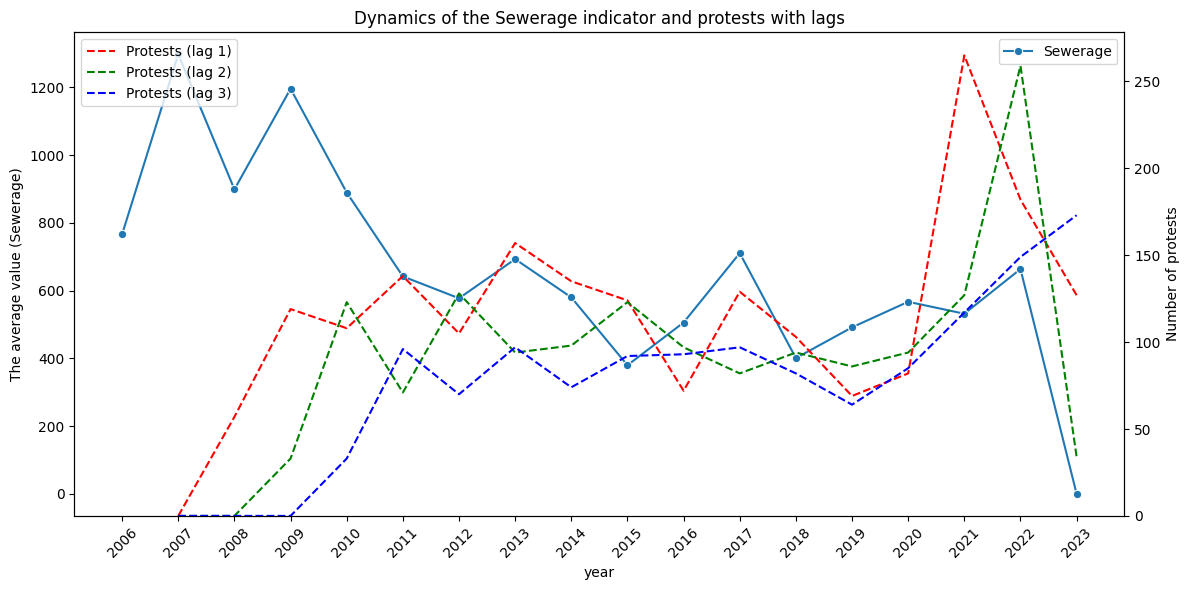

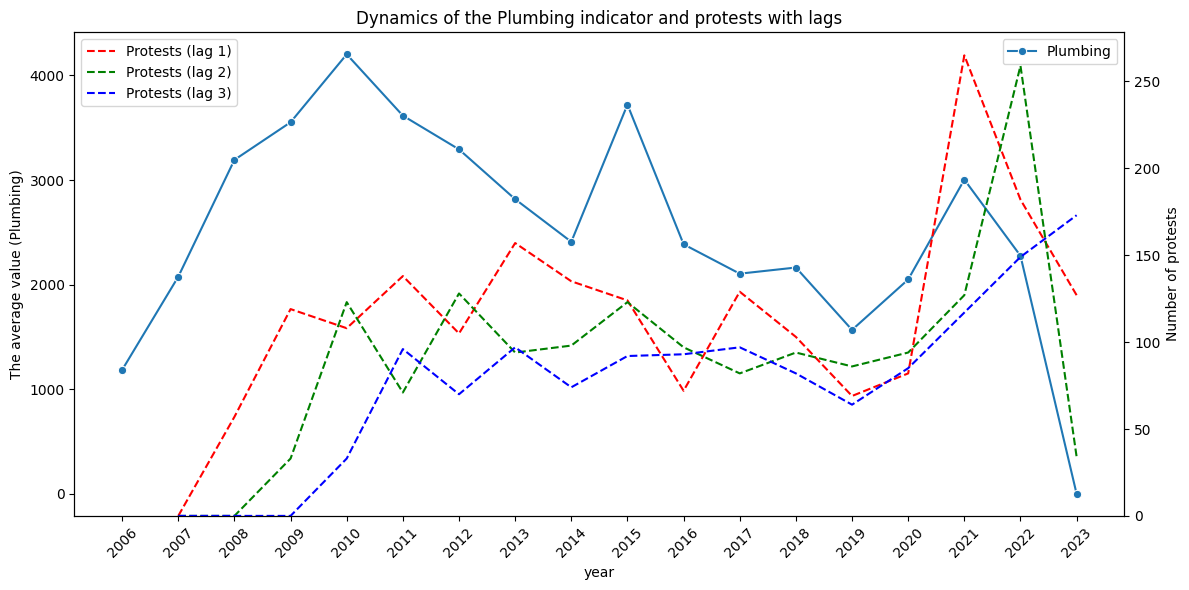

In [8]:
data = pd.read_csv('общие_данные_balanced.csv')

# Определяем, какие события считаем протестами
protest_events = ["Demonstrate or rally", "Criticize or denounce", "Defy norms, law"]
protests = data[data['Event Text'].isin(protest_events)]

# Считаем количество протестов по муниципалитетам и годам
protests_count = (
    protests
    .groupby(['municipality', 'year'])
    .size()
    .reset_index(name='protest_count')
)




# Считаем количество протестов по муниципалитетам и годам
protests_count = protests.groupby(['municipality', 'year']).size().reset_index(name='protest_count')
for lag in [1, 2, 3]:
    protests_count[f'protest_lag_{lag}'] = protests_count.groupby('municipality')['protest_count'].shift(lag)


merged_data = pd.merge(data, protests_count, on=['municipality', 'year'], how='left')
merged_data.fillna(0, inplace=True)


dependent_vars = ['Жилье (1000 м2)', 'Дороги (%)', 'Канализация (1 м)', 'Водопровод (1 метр)']

# Считаем средние значения инфраструктуры по годам
annual_infra = (
    merged_data
    .groupby('year')[dependent_vars]
    .mean()
    .reset_index()
)

# Считаем суммарное число протестов и их лаги по годам
annual_protests = (
    protests_count
    .groupby('year')
    .agg({
        'protest_count': 'sum',
        'protest_lag_1': 'sum',
        'protest_lag_2': 'sum',
        'protest_lag_3': 'sum',
    })
    .reset_index()
    .rename(columns={'protest_count': 'protest_sum'})
)


annual_data = pd.merge(
    annual_infra,
    annual_protests,
    on='year',
    how='left'
)
annual_data = annual_data[annual_data['year'] >= 2000]

rename_map = {
    'Жилье (1000 м2)': 'Housing',
    'Дороги (%)': 'Roads',
    'Канализация (1 м)': 'Sewerage',
    'Водопровод (1 метр)': 'Plumbing'
}
annual_data.rename(columns=rename_map, inplace=True)


dependent_vars = ['Housing', 'Roads', 'Sewerage', 'Plumbing']


for dep_var in dependent_vars:
    plt.figure(figsize=(12, 6))

    ax1 = plt.gca()
    sns.lineplot(
        data=annual_data,
        x='year', y=dep_var,
        ax=ax1,
        marker='o',
        label=dep_var
    )

    ax1.xaxis.set_major_locator(MultipleLocator(1))
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel(f'The average value ({dep_var})')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    sns.lineplot(
        data=annual_data,
        x='year', y='protest_lag_1',
        ax=ax2,
        color='red', linestyle='--',
        label='Protests (lag 1)'
    )
    sns.lineplot(
        data=annual_data,
        x='year', y='protest_lag_2',
        ax=ax2,
        color='green', linestyle='--',
        label='Protests (lag 2)'
    )
    sns.lineplot(
        data=annual_data,
        x='year', y='protest_lag_3',
        ax=ax2,
        color='blue', linestyle='--',
        label='Protests (lag 3)'
    )

    ax2.set_ylabel('Number of protests')
    ax2.set_ylim(bottom=0)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines2 = lines2[len(lines1):]
    labels2 = labels2[len(labels1):]

    plt.title(f'Dynamics of the {dep_var} indicator and protests with lags')
    plt.tight_layout()
    plt.show()


# Считаем суммарное число протестов по годам (без лагов)
annual_protests_simple = (
    protests_count
    .groupby('year')['protest_count']
    .sum()
    .reset_index()
)

# Фильтруем по нужному диапазону лет, если требуется
annual_protests_simple = annual_protests_simple[annual_protests_simple['year'] >= 2000]



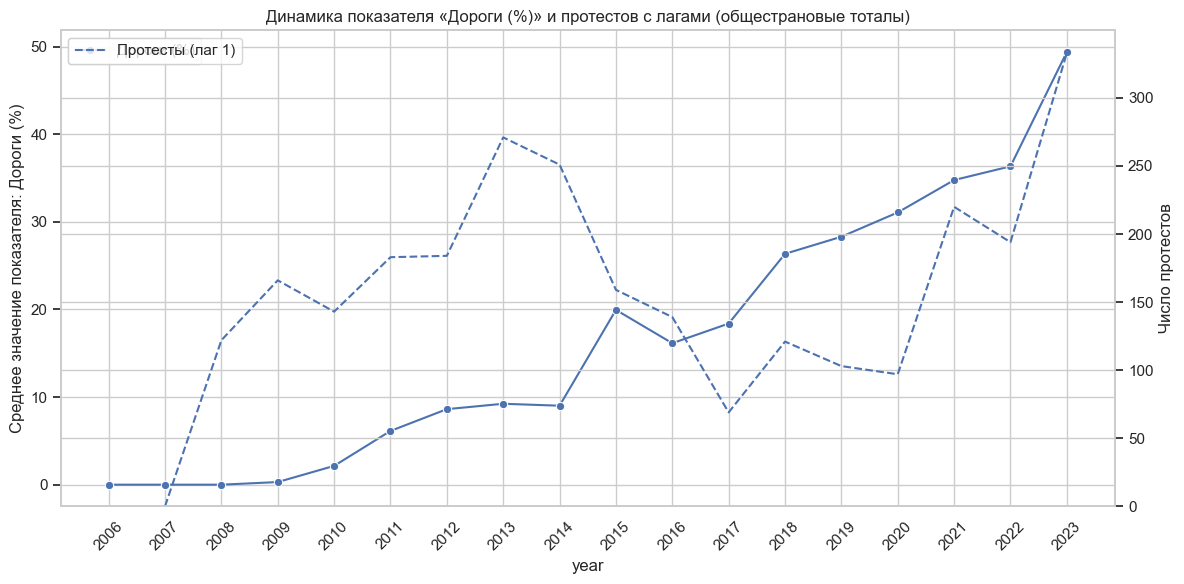

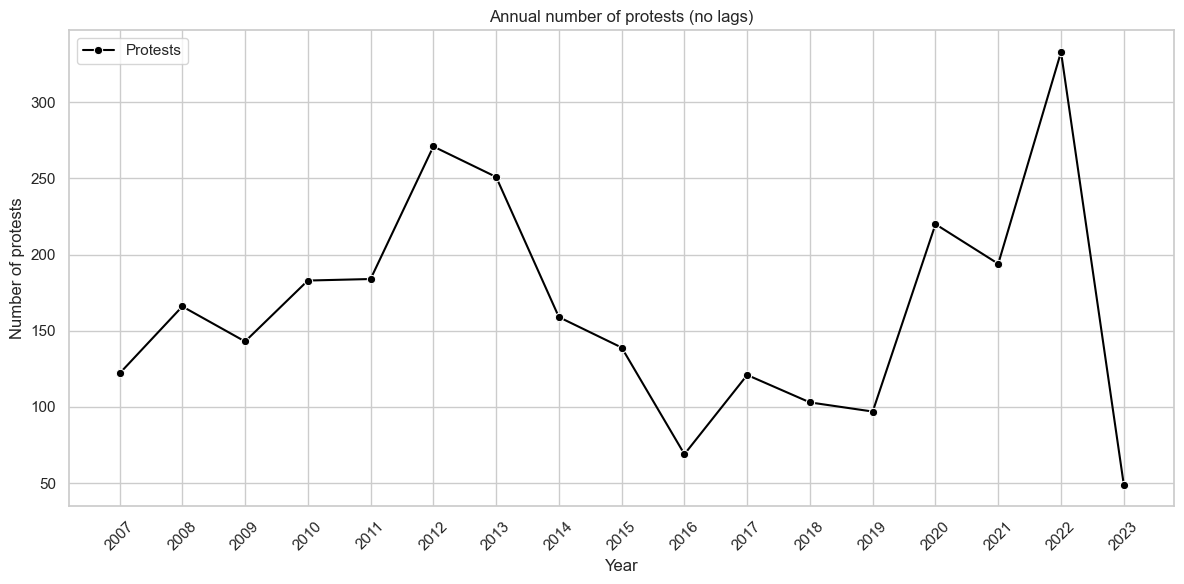

In [13]:

data = pd.read_csv('общие_данные_new1.csv')

# Приведение типов ключей
data['year'] = pd.to_numeric(data['year'], errors='coerce').astype('Int64')
data['oktmo'] = data['oktmo'].astype(str).str.strip()
event_col = 'Event Text'
OUTCOMES = ['Дороги (%)']
protest_events = ["Demonstrate or rally", "Criticize or denounce", "Defy norms, law"]

# Фильтруем события до протестных
protests = data[data[event_col].isin(protest_events)].copy()

# Общее число протестных событий по стране (предполагаем 1 строка = 1 событие)
total_by_year = (
    protests
    .groupby('year')
    .size()
    .reset_index(name='protest_sum')
    .sort_values('year')
)

# Лаги ОТ ОБЩЕСТРАНОВОГО тотала (это и есть "сумма протестов с лагом")
for k in [1]:
    total_by_year[f'protest_sum_lag_{k}'] = total_by_year['protest_sum'].shift(k)

total_by_year = total_by_year.fillna(0)


panel = data[['year', 'oktmo', 'municipality', 'region_name'] + OUTCOMES].copy()
panel = panel.dropna(subset=['year', 'oktmo']).drop_duplicates(subset=['year', 'oktmo'])
for col in OUTCOMES:
    panel[col] = pd.to_numeric(panel[col], errors='coerce')


annual_infra = (
    panel
    .groupby('year')[OUTCOMES]
    .mean(numeric_only=True)
    .reset_index()
    .sort_values('year')
)


annual_data = pd.merge(annual_infra, total_by_year, on='year', how='left')
annual_data = annual_data[annual_data['year'] >= 2000].sort_values('year')

sns.set(style="whitegrid")

for dep_var in OUTCOMES:
    plt.figure(figsize=(12, 6))

    ax1 = plt.gca()
    sns.lineplot(
        data=annual_data,
        x='year', y=dep_var,
        ax=ax1,
        marker='o',
        label=dep_var
    )
    ax1.xaxis.set_major_locator(MultipleLocator(1))
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel(f'Среднее значение показателя: {dep_var}')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    # Линии именно "сумма протестов с лагом", а не суммирование муниципальных лагов
    sns.lineplot(
        data=annual_data,
        x='year', y='protest_sum_lag_1',
        ax=ax2,
        linestyle='--',
        label='Протесты (лаг 1)'
    )

    ax2.set_ylabel('Число протестов')
    ax2.set_ylim(bottom=0)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines2 = lines2[len(lines1):]
    labels2 = labels2[len(labels1):]
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

    plt.title(f'Динамика показателя «{dep_var}» и протестов с лагами (общестрановые тоталы)')
    plt.tight_layout()
    plt.show()


    annual_protests_simple = (
    protests_count
    .groupby('year')['protest_count']
    .sum()
    .reset_index()
)

    annual_protests_simple = annual_protests_simple[annual_protests_simple['year'] >= 2000]

    # Построение графика
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    sns.lineplot(
        data=annual_protests_simple,
        x='year', y='protest_count',
        ax=ax,
        marker='o',
        color='black',
        label='Protests'
    )

    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of protests')
    plt.title('Annual number of protests (no lags)')
    plt.legend()
    plt.tight_layout()
    plt.show()



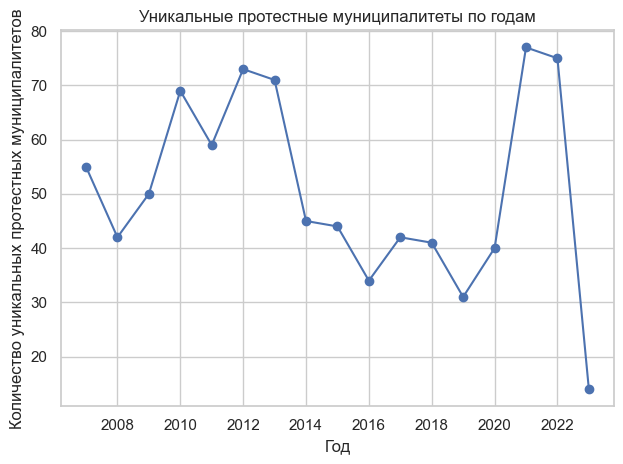

In [ ]:
data = pd.read_csv('общие_данные_new1.csv')
protest_events = ["Demonstrate or rally", "Criticize or denounce", "Defy norms, law"]
protests = data[data['Event Text'].isin(protest_events)]

# Считаем количество уникальных протестных муниципалитетов по годам
unique_municipalities_per_year = (
    protests
    .groupby('year')['municipality']
    .nunique()
    .reset_index(name='unique_municipalities')
)

# Построение графика
plt.figure()
plt.plot(
    unique_municipalities_per_year['year'],
    unique_municipalities_per_year['unique_municipalities'],
    marker='o'
)
plt.xlabel('Год')
plt.ylabel('Количество уникальных протестных муниципалитетов')
plt.title('Уникальные протестные муниципалитеты по годам')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.tight_layout()
plt.show()


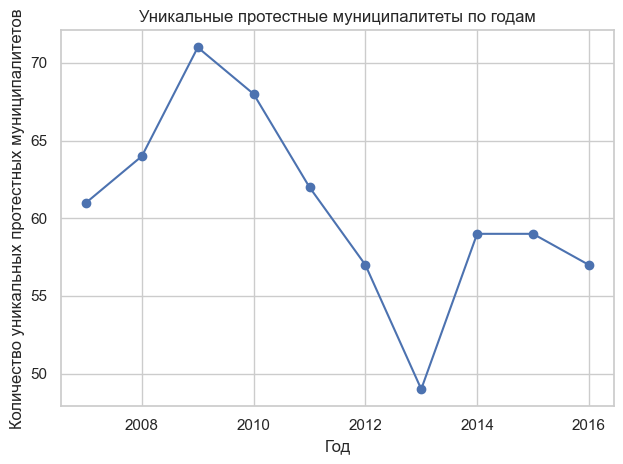

In [15]:
data = pd.read_csv('новые_протесты_рус3.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['year'] = data['Date'].dt.year  
protests = data

# Считаем количество уникальных протестных муниципалитетов по годам
unique_municipalities_per_year = (
    protests
    .groupby('year')['municipality']
    .nunique()
    .reset_index(name='unique_municipalities')
)

# Построение графика
plt.figure()
plt.plot(
    unique_municipalities_per_year['year'],
    unique_municipalities_per_year['unique_municipalities'],
    marker='o'
)
plt.xlabel('Год')
plt.ylabel('Количество уникальных протестных муниципалитетов')
plt.title('Уникальные протестные муниципалитеты по годам')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.tight_layout()
plt.show()
